In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
import math as m
import scipy.fftpack
from scipy.signal import find_peaks

## Analysis of the frequency of STOs as a function of temperature, in IO single cell model C51A, using FFT instead of direct peak detection

Alternative to *TemperatureDependence_FrequencySTOs_allCells.ipynb* using FFT instead of peak detection of the time signals.  
Code can be used as starting point, but should be reviewed, as obtained frequencies are inaccurate.

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [4]:
data_set = pd.read_csv("SimulationResults/6_C51A.csv", index_col=0)
data_set = data_set.drop(['0.24999'], axis=1)
data_set.head()

,0.25,0.25001,0.25002,0.25003,0.25004,0.25005,0.25006,0.25007,0.25008,0.25009,...,0.99991,0.99992,0.99993,0.99994,0.99995,0.99996,0.99997,0.99998,0.99999,1.0
20.0degC,-0.053363,-0.053363,-0.053363,-0.053363,-0.053363,-0.053363,-0.053363,-0.053363,-0.053363,-0.053363,...,-0.051782,-0.051782,-0.051782,-0.051782,-0.051782,-0.051782,-0.051782,-0.051782,-0.051782,-0.051782
20.1degC,-0.053432,-0.053432,-0.053432,-0.053432,-0.053432,-0.053432,-0.053431,-0.053431,-0.053431,-0.053431,...,-0.051802,-0.051802,-0.051802,-0.051802,-0.051802,-0.051802,-0.051802,-0.051802,-0.051802,-0.051802
20.2degC,-0.053490,-0.053490,-0.053490,-0.053490,-0.053490,-0.053489,-0.053489,-0.053489,-0.053489,-0.053489,...,-0.051822,-0.051822,-0.051822,-0.051822,-0.051822,-0.051822,-0.051822,-0.051822,-0.051822,-0.051822
20.3degC,-0.053533,-0.053533,-0.053532,-0.053532,-0.053532,-0.053532,-0.053531,-0.053531,-0.053531,-0.053530,...,-0.051842,-0.051842,-0.051842,-0.051842,-0.051842,-0.051842,-0.051842,-0.051842,-0.051842,-0.051842
20.4degC,-0.052074,-0.052074,-0.052073,-0.052073,-0.052072,-0.052072,-0.052071,-0.052071,-0.052070,-0.052070,...,-0.051861,-0.051861,-0.051861,-0.051861,-0.051861,-0.051861,-0.051861,-0.051861,-0.051861,-0.051861


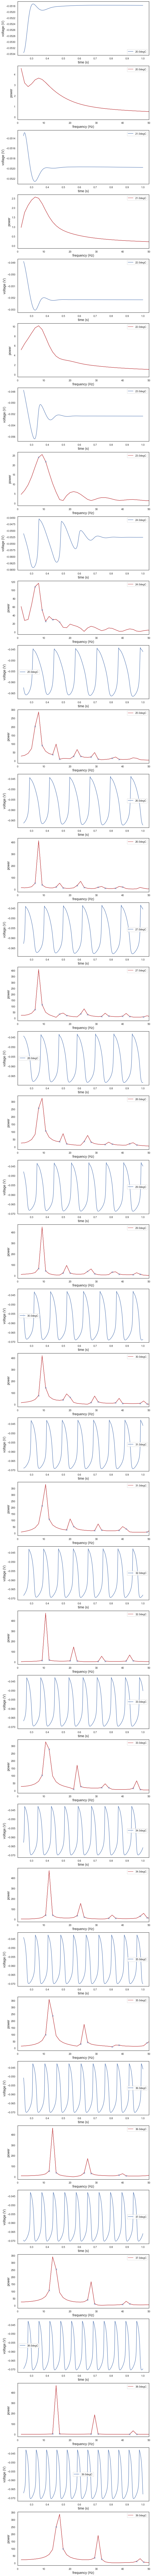

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7.999893334755535, 7.999893334755535, 7.999893334755535, 7.999893334755535, 7.999893334755535, 7.999893334755535, 9.333208890548125, 9.333208890548125, 9.333208890548125, 9.333208890548125, 9.333208890548125, 9.333208890548125, 9.333208890548125, 7.999893334755535, 7.999893334755535, 7.999893334755535, 7.999893334755535, 9.333208890548125, 8.666551112651831, 8.666551112651831, 7.999893334755535, 9.333208890548125, 9.333208890548125, 9.333208890548125, 9.333208890548125, 9.333208890548125, 9.333208890548125, 9.333208890548125, 9.99986666844442, 9.99986666844442, 9.99986666844442, 9.99986666844442, 9.99986666844442, 9.99986666844442, 9.99986666844442, 9.99986666844442, 10.666524446340715, 10.666524446340715, 10.666524446340715, 10.666524446340715, 10.666524446340715, 10.666524446340715, 10.666524446340715, 10.666524446340715, 10.666524446340715, 10.666524446340715, 10.666524446340715, 10.666524446340715, 10.666524446340715, 

In [5]:
data_setT = data_set.transpose()
ran = range(40, 43)
ran = range(data_setT.shape[1])

data = data_setT.iloc[:,0]
t = []
for i in list(data.index.values):
    t.append(float(i))

freqs = []
fig, ax = plt.subplots(40,1,figsize=(10,5*40))
window = 0
for temp_ind in ran:
    data = data_setT.iloc[:,temp_ind]
    N = len(data) # data size
    T = 0.00001 # inverse of sampling rate
    x = np.linspace(0.0, N*T, N)
    y = data.values
    yf = np.abs(scipy.fft.fft(y))
    xf = scipy.fftpack.fftfreq(data.size, d=T)
    yf_abs = np.abs(yf)
    xf_abs = np.abs(xf)
    peaks, _ = find_peaks(yf_abs[1:], height=20)

    if len(xf_abs[peaks])==0:
        freqs.append(0)
    else:
        freqs.append((xf_abs[peaks][0]+xf_abs[peaks][1])/2)
    if temp_ind % 10 == 0 and window < 39:
        ax[window].plot(t, data.values)
        ax[window].set_xlabel('time (s)', fontsize=14)
        ax[window].set_ylabel('voltage (V)', fontsize=14)
        ax[window].legend([data_setT.columns[temp_ind]])
        window += 1
   
        ax[window].plot(xf_abs[1:], yf_abs[1:], color='r')
        ax[window].plot(xf_abs[peaks], yf_abs[peaks], 'x')
        ax[window].set_xlim([0, 50])
        ax[window].set_xlabel('frequency (Hz)', fontsize=14)
        ax[window].set_ylabel('power', fontsize=14)
        ax[window].legend([data_setT.columns[temp_ind]])
        window += 1 
plt.show()
print(freqs)